**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/deep-neural-networks).**

---


# Introduction #

In the tutorial, we saw how to build deep neural networks by stacking layers inside a `Sequential` model. By adding an *activation function* after the hidden layers, we gave the network the ability to learn more complex (non-linear) relationships in the data.

In these exercises, you'll build a neural network with several hidden layers and then explore some activation functions beyond ReLU. Run this next cell to set everything up!

In [ ]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In the *Concrete* dataset, your task is to predict the compressive strength of concrete manufactured according to various recipes.

Run the next code cell without changes to load the dataset.

In [ ]:
import pandas as pd

concrete = pd.read_csv('Concrete Compressive Strength.csv')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
concrete.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [ ]:
concrete.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
train_X = concrete.copy()
# Remove target
train_y = train_X.pop('Concrete compressive strength(MPa, megapascals) ')

In [ ]:
print(train_X.shape)
print(train_y.shape)

(1030, 8)
(1030,)


# 1) Input Shape #

The target for this task is the column `'CompressiveStrength'`. The remaining columns are the features we'll use as inputs.

What would be the input shape for this dataset?

In [ ]:
# YOUR CODE HERE
input_shape = 
print(input_shape)

[8]


# 2) Define a Model with Hidden Layers #

Now create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = 

# 3) Activation Layers #

Let's explore activations functions some.

The usual way of attaching an activation function to a `Dense` layer is to include it as part of the definition with the `activation` argument. Sometimes though you'll want to put some other layer between the `Dense` layer and its activation function. (We'll see an example of this in Lesson 5 with *batch normalization*.) In this case, we can define the activation in its own `Activation` layer, like so:

```
layers.Dense(units=8),
layers.Activation('relu')
```

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

Rewrite the following model so that each activation is in its own `Activation` layer.

In [ ]:
### YOUR CODE HERE: rewrite this to use activation layers
model = 

# Optional: Alternatives to ReLU #

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

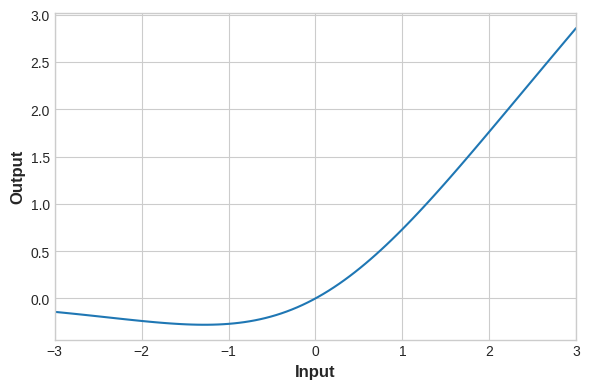

In [ ]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# 4) Add Loss and Optimizer

Before training the network we need to define the loss and optimizer we'll use. Using the model's `compile` method, add the Adam optimizer and MSE loss.

In [ ]:
# YOUR CODE HERE


# 5) Train Model

Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is `X` with target `y`.

In [ ]:
# YOUR CODE HERE
history = 

Epoch 1/200
9/9 [==============================] - 1s 9ms/step - loss: 9466.8428
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 2514.0579
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 703.6599
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 573.7789
Epoch 5/200
9/9 [==============================] - 0s 9ms/step - loss: 285.7825
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 194.1572
Epoch 7/200
9/9 [==============================] - 0s 7ms/step - loss: 157.4522
Epoch 8/200
9/9 [==============================] - 0s 7ms/step - loss: 134.9791
Epoch 9/200
9/9 [==============================] - 0s 7ms/step - loss: 117.0237
Epoch 10/200
9/9 [==============================] - 0s 8ms/step - loss: 108.6567
Epoch 11/200
9/9 [==============================] - 0s 7ms/step - loss: 102.8074
Epoch 12/200
9/9 [==============================] - 0s 8ms/step - loss: 96.3286
Epoch 13/200
9/9 [==================

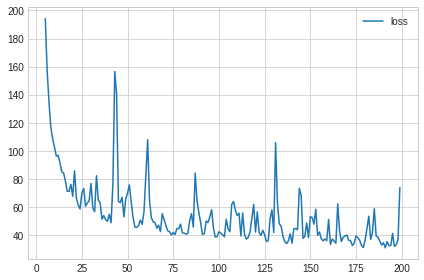

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();